In [29]:
import pandas as pd
import numpy as np
#Load common functions
# %run common.ipynb
import ipynb.fs.full.common as common

# #OJO!!!!!!! 
eL DATASET TIENE A CHECOSLOVAQUIA Y TAMBIEN REPUBLICA CHECA Y ESLOVAQUIA. VER CUANDO SE DIVIDEN Y PENSAR QUE HACER.
PARA DEVELOPED -> Esos paises estan pero con todos sus valores en null, lo que da mucha mas confianza sobre la calidad de los datos. Gracias ingenieros y cientificos que vinieron antes que yo :)
Evaluar tambien la posibilidad de tener una notebook propia de limpieza para cada set de datos que guarde en otro lado el dataset limpio y listo para ser consumido para su comparacion contra mml. Seria una notebook por dataset por region, sin mucho para automatizar o factorizar, ya que es un trabajo artesanal

In [30]:
MML_VARIABLE_ANALYZED = 'EXLIFE'
REGION = 'DEVELOPED' 

In [31]:
df = pd.read_excel(f"data/{REGION}/Life Expectancy.xlsx", sheet_name='countries_and_territories')
df[0:5]

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Abkhazia,Life expectancy,abkh,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Life expectancy,afg,lex,28.21,28.20,28.19,28.18,28.17,28.16,...,69.95,70.07,70.19,70.31,70.44,70.57,70.70,70.83,70.96,71.09
2,Akrotiri and Dhekelia,Life expectancy,akr_a_dhe,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Life expectancy,alb,lex,35.40,35.40,35.40,35.40,35.40,35.40,...,88.29,88.40,88.51,88.62,88.73,88.84,88.95,89.06,89.17,89.28
4,Algeria,Life expectancy,dza,lex,28.82,28.82,28.82,28.82,28.82,28.82,...,89.37,89.49,89.61,89.73,89.85,89.97,90.09,90.21,90.33,90.45


In [32]:
del df['indicator.name']
del df['geo']
del df['indicator']
df.columns = df.columns.astype(str)

In [33]:
def fix_countries_for_region(df, region=REGION):
    '''Matc h country column name in dataset with MML dict of country names for region.
    Unfortunately, it's a manual job. We know which names are missing according to MML, but we don't how the truth dataset named that country (if exists at all).
    
    '''
    if region == 'DEVELOPED':
        fix_countries_for_developed(df)
def fix_countries_for_developed(df):
    common.replace_value_in_column(df,'geo.name', 'Ukraine', 'Ucrania')
    common.replace_value_in_column(df,'geo.name','Bosnia and Herzegovina','Bosnia y Herzegovina')
    common.replace_value_in_column(df,'geo.name','Kyrgyz Republic','Kirguistan')
    common.replace_value_in_column(df,'geo.name','Germany','Alemania')
    common.replace_value_in_column(df,'geo.name','France','Francia')
    common.replace_value_in_column(df,'geo.name','Macedonia, FYR','Macedonia')
    common.replace_value_in_column(df,'geo.name','Slovenia','Eslovenia')
    common.replace_value_in_column(df,'geo.name','Slovak Republic','Eslovaquia')
    common.replace_value_in_column(df,'geo.name','Switzerland','Suiza')
    common.replace_value_in_column(df,'geo.name','Denmark','Dinamarca')
    common.replace_value_in_column(df,'geo.name','United Kingdom','Reino Unido')
    common.replace_value_in_column(df,'geo.name','New Zealand','Nueva Zelanda')
    common.replace_value_in_column(df,'geo.name','Spain','España')
    common.replace_value_in_column(df,'geo.name','Poland','Polonia')
    common.replace_value_in_column(df,'geo.name','Ireland','Irlanda')
    common.replace_value_in_column(df,'geo.name','Romania','Rumania')
    common.replace_value_in_column(df,'geo.name','Finland','Finlandia')
    common.replace_value_in_column(df,'geo.name','Moldova','Moldavia')
    common.replace_value_in_column(df,'geo.name','Sweden','Suecia')
    common.replace_value_in_column(df,'geo.name','Kazakhstan','Kazajistan')
    common.replace_value_in_column(df,'geo.name','Russia','Rusia')
    common.replace_value_in_column(df,'geo.name','Latvia','Letonia')
    common.replace_value_in_column(df,'geo.name','Norway','Noruega')
    common.replace_value_in_column(df,'geo.name','Lebanon','Libano')
    common.replace_value_in_column(df,'geo.name','Czech Republic','Republica Checa')
    common.replace_value_in_column(df,'geo.name','Hungary','Hungria')
    common.replace_value_in_column(df,'geo.name','Azerbaijan','Azerbaiyan')
    common.replace_value_in_column(df,'geo.name','Japan','Japon')
    common.replace_value_in_column(df,'geo.name','United States','EEUU')
    common.replace_value_in_column(df,'geo.name','Greece','Grecia')
    common.replace_value_in_column(df,'geo.name','Italy','Italia')
    common.replace_value_in_column(df,'geo.name','Belgium','Belgica')
    common.replace_value_in_column(df,'geo.name','Belarus','Bielorrusia')
    common.replace_value_in_column(df,'geo.name','Tajikistan','Tayikistan')
    common.replace_value_in_column(df,'geo.name','Croatia','Croacia')
    common.replace_value_in_column(df,'geo.name','Lithuania','Lituania')
    common.replace_value_in_column(df,'geo.name','Netherlands','Paises Bajos')
    

In [34]:
print(f"Missing countries for region {REGION}")
missing_countries = common.get_missing_countries_for_region(df, 'geo.name', REGION)
print(missing_countries)
fix_countries_for_region(df)
missing_countries = common.get_missing_countries_for_region(df, 'geo.name', REGION)
print("Missing countries for region after fix")
print(missing_countries)

Missing countries for region DEVELOPED
{'Irlanda', 'Rusia', 'Letonia', 'Tayikistan', 'Japon', 'Bielorrusia', 'Moldavia', 'Noruega', 'Hungria', 'Bosnia y Herzegovina', 'Reino Unido', 'Azerbaiyan', 'Dinamarca', 'Suiza', 'Francia', 'Eslovenia', 'Belgica', 'Kazajistan', 'Croacia', 'Nueva Zelanda', 'Rumania', 'Republica Checa', 'Macedonia', 'EEUU', 'España', 'Finlandia', 'Libano', 'Ucrania', 'Suecia', 'Eslovaquia', 'Polonia', 'Paises Bajos', 'Alemania', 'Kirguistan', 'Lituania', 'Grecia', 'Italia'}
Missing countries for region after fix
set()


In [35]:
df_truth = common.get_countries_for_region(df, 'geo.name', REGION)
assert len(df_truth) == len(common.regions[REGION]['countries']), 'MISSING COUNTRIES FOR REGION'

According to dataset documentation, it start predicting after 2019.
So, we only consider data until that year
See https://www.gapminder.org/data/documentation/gd003/

In [36]:
years_filtered = np.arange(1970,2019,2)
columns_filter = np.append(['geo.name'],years_filtered)

df_truth = df_truth[columns_filter]
assert 0 == df_truth.isna().sum().sum(), "MISSING VALUES. CONSIDER FILL STRATEGY" #If 0, then we don't have missing values.
assert not (df_truth == 0).any().any(), "CELLS WITH 0" 

Finally, we got our truth dataframe. Now, MML

In [37]:
df_mml = common.get_mml_data(REGION)
df_mml = df_mml[['Year',MML_VARIABLE_ANALYZED]]
df_mml = df_mml[df_mml.Year <= 2018]
df_mml[0:3]

,Year,EXLIFE
0,1960,69.44
1,1962,69.58
2,1964,69.92


Ok, that was easy. Back to truth df. 
We need to transpose df, and group by some condition

In [38]:
df_T = df_truth.set_index('geo.name').T
df_T = df_T.reset_index().rename(columns={"index": "Year"})
df_truth = df_T.astype({'Year': 'int64'})
df_truth['mean'] = df_truth.iloc[:, 1:len(common.regions[REGION]['countries'])+1].mean(axis=1)
df_truth_aggs = df_truth[['Year','mean']]

In [39]:
df_comparison = pd.merge(df_mml,df_truth_aggs,on='Year').rename(columns={"EXLIFE": "mml_value", "mean":"truth_mean"})
df_comparison[0:3]

,Year,mml_value,truth_mean
0,1970,70.44,69.006078
1,1972,70.52,69.511373
2,1974,70.66,69.988431


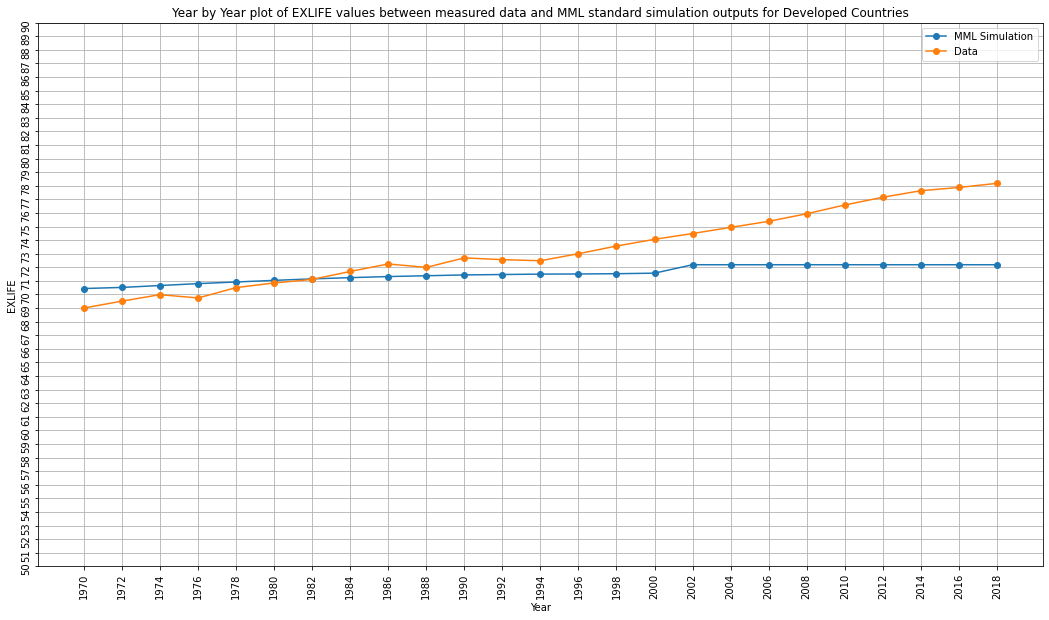

In [40]:
common.compare_mml_vs_truth_line_plot(df=df_comparison, x_col_name='Year', y_col_mml='mml_value', y_col_truth='truth_mean',variable_analyzed=MML_VARIABLE_ANALYZED, region=REGION, y_ticks=np.arange(50,91))

Mean seems to be quite accurate in that interval

### Error visualization

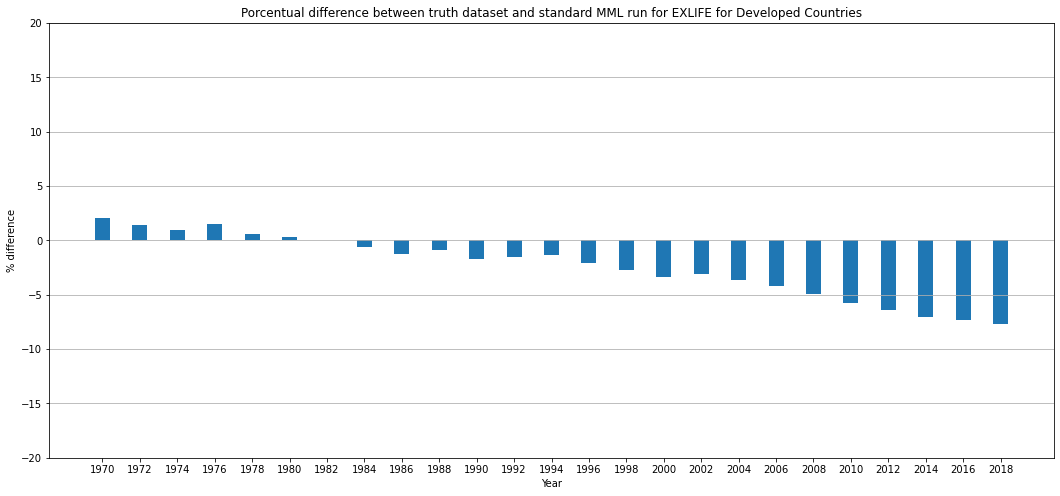

In [41]:
common.compute_porcentual_diff_between_truth_and_mml(df_comparison,'mml_value', 'truth_mean')
common.porcentual_diff_plot(df_comparison,MML_VARIABLE_ANALYZED, REGION, years_filtered, np.arange(-20,21,5))

In [42]:
common.save_porcentual_diff_to_excel_for_variable(df_comparison, MML_VARIABLE_ANALYZED, REGION)